# Final Presentation - by Jacob Nogle

In [1]:
import pandas as pd
from altair import *

Three parts to the game of baseball: Pitching, Batting, and Fielding. Does one of these parts alone have a more significant effect on team performance than the others?

## Dataset

"The History of Baseball" - kaggle.com

Major League Baseball data from 1871-2015

Filtered to 2000-2015

### Regular Season

In [2]:
grouped = pd.read_pickle('/home/jnogle/finalproject/dataframes/grouped')
grouped.head()

,year,team_id,div_id,rank,g,w,ws_win,name,e,ba,era
0,2000,ANA,W,3,162,82,N,Anaheim Angels,2.310345,0.271819,5.384400
1,2000,ARI,W,3,162,85,N,Arizona Diamondbacks,1.945455,0.247616,5.310000
2,2000,ATL,E,1,162,95,N,Atlanta Braves,2.388889,0.184948,5.575909
3,2000,BAL,E,4,162,74,N,Baltimore Orioles,1.966102,0.202421,6.768636
4,2000,BOS,E,2,162,85,N,Boston Red Sox,1.651515,0.207478,5.046667


### Postseason

In [3]:
grouped_post = pd.read_pickle('/home/jnogle/finalproject/dataframes/grouped_post')
grouped_post.head()

,year,team_id,div_id,rank,g,w,ws_win,name,e,ba,era
0,2000,ATL,E,1,162,95,N,Atlanta Braves,0.238095,0.175931,7.628889
1,2000,CHA,C,1,162,95,N,Chicago White Sox,0.086957,0.173783,3.856667
2,2000,NYA,E,1,161,87,Y,New York Yankees,0.081967,0.267127,3.004583
3,2000,NYN,E,2,162,94,N,New York Mets,0.123288,0.182100,3.388621
4,2000,OAK,W,1,161,91,N,Oakland Athletics,0.200000,0.323959,2.360000


## Visualizations

First I checked regular season individual team statistics.

In [4]:
giants_reg = grouped[grouped.name == 'San Francisco Giants']

### Giants Regular Season ERA

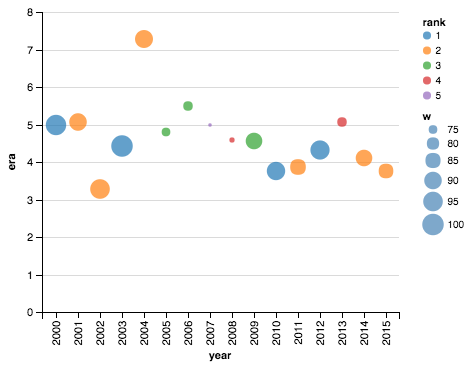

In [5]:
Chart(giants_reg).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Size('w'),
    Color('rank:N')
).configure_cell(height=300)

### Giants Regular Season Batting Average

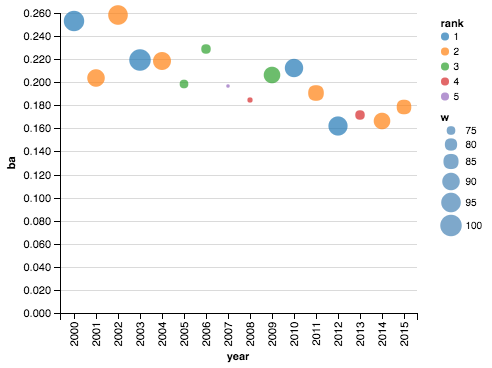

In [6]:
Chart(giants_reg).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Size('w'),
    Color('rank:N')
).configure_cell(height=300)

### Giants Regular Season Fielding Errors

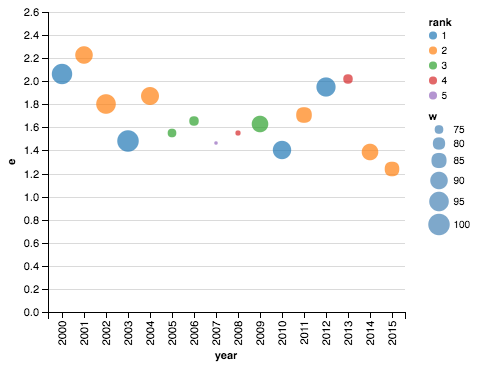

In [7]:
Chart(giants_reg).mark_circle().encode(
    X('year:N'),
    Y('e'),
    Size('w'),
    Color('rank:N')
).configure_cell(height=300)

I also checked postseason statistics for individual teams, where I measured performance by a World Series win in that year.

In [8]:
RS_post = grouped_post[grouped_post.name == 'Boston Red Sox']

### Red Sox Postseason ERA

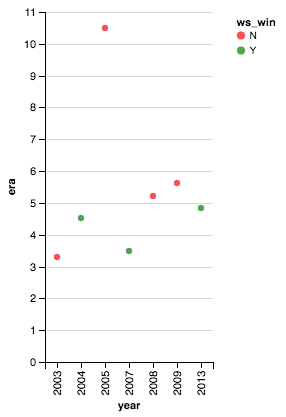

In [9]:
Chart(RS_post).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

### Red Sox Postseason Batting Average

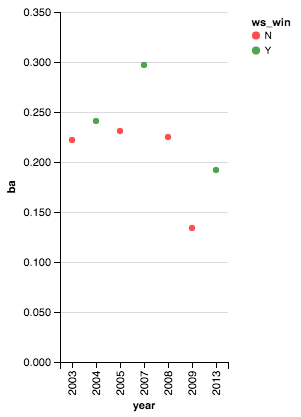

In [10]:
Chart(RS_post).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

### Red Sox Postseason Fielding Errors

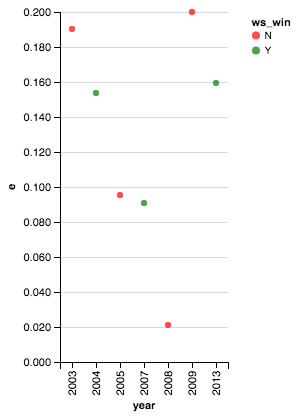

In [11]:
Chart(RS_post).mark_circle().encode(
    X('year:N'),
    Y('e',axis=Axis(format='.3f')),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

Finally, I measured the performance of teams who won the World Series in the postseason against the rest of the teams who made the postseason but did not win. 

In [12]:
winners = grouped_post[grouped_post.ws_win == 'Y']

In [13]:
losers = grouped_post[grouped_post.ws_win == 'N']
losers['era'][134] = None
losers = losers.dropna()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


### World Series Winners ERA

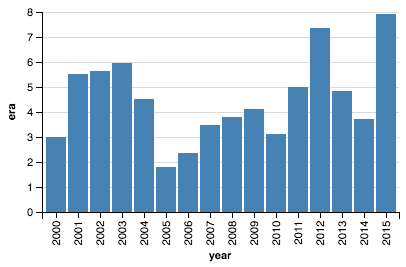

In [14]:
Chart(winners).mark_bar().encode(
    X('year:N'),
    Y('era')
).configure_cell(width = 100, height = 200)

### Non-World Series Winners ERA

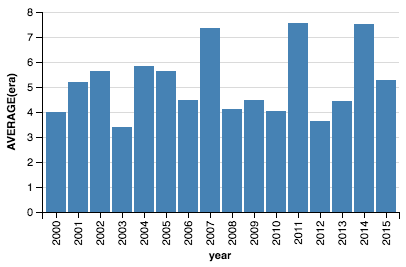

In [15]:
Chart(losers).mark_bar().encode(
    X('year:N'),
    Y('average(era)')
).configure_cell(width = 100, height = 200)

### World Series Winners vs. The Rest : ERA

In [16]:
avg_losers_era = losers.groupby('year')['era'].mean()

In [17]:
winners_era = winners.groupby('year')['era'].mean()

In [18]:
era_diff = winners_era - avg_losers_era
era_diff

year
2000   -0.975625
2001    0.305962
2002    0.015512
2003    2.549232
2004   -1.311214
2005   -3.846652
2006   -2.126060
2007   -3.879368
2008   -0.325184
2009   -0.367070
2010   -0.917888
2011   -2.564510
2012    3.730506
2013    0.430498
2014   -3.779416
2015    2.645852
Name: era, dtype: float64

In [19]:
era_diff.mean()

-0.65096405061086982

On average, the winners of the World Series had a lower ERA than the rest of the teams in the postseason by 0.65. Although this is what we want to see, it is not very significant.

### World Series Winners vs. The Rest : Batting Average

Here is the same calculation for batting average.

In [20]:
avg_losers_ba = losers.groupby('year')['ba'].mean()

In [21]:
winners_ba = winners.groupby('year')['ba'].mean()

In [22]:
ba_diff = winners_ba - avg_losers_ba
ba_diff.mean()

0.033547226015755299

World series winners performed better than the rest of the teams in the postseason, but by a very insignificant margin.

### World Series Winners vs. The Rest: Fielding Errors

Finally, here is the calculation for fielding errors.

In [23]:
avg_losers_e = losers.groupby('year')['e'].mean()

In [24]:
winners_e = winners.groupby('year')['e'].mean()

In [25]:
e_diff = winners_e - avg_losers_e
e_diff.mean()

-0.0031612086217473519

World series winners performed better in this case too, but by a miniscule amount.

### Conclusion from Visualization

Although there are slight correlations there, it is not enough to come to a reasonable conclusion that any one of these parts of the game have a significant influence on the performance of a team. However, these slight correlations offer the possibilities of more in-depth data analysis to further explore the question. 

## Machine Learning

In [26]:
ml = grouped.drop(['year','team_id','div_id','g','name'],axis=1)

### Feature Matrix

In [27]:
X = ml.drop('ws_win',axis=1)
X.head()

,rank,w,e,ba,era
0,3,82,2.310345,0.271819,5.384400
1,3,85,1.945455,0.247616,5.310000
2,1,95,2.388889,0.184948,5.575909
3,4,74,1.966102,0.202421,6.768636
4,2,85,1.651515,0.207478,5.046667


In [28]:
X.shape

(480, 5)

### Target Array

In [29]:
y = grouped['ws_win']
y.head()

0    N
1    N
2    N
3    N
4    N
Name: ws_win, dtype: object

In [30]:
y.shape

(480,)

### Train/Test/Split

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=0,train_size=0.7)

### Linear SVC 

In [33]:
from sklearn.svm import LinearSVC
LSVCmodel = LinearSVC(dual=False)
LSVCmodel.fit(Xtrain,ytrain);

In [34]:
LSVCtraining_Acc = accuracy_score(ytrain,LSVCmodel.predict(Xtrain))
print("Training Set Prediction Accuracy =", LSVCtraining_Acc)

LSVCtest_Acc = accuracy_score(ytest,LSVCmodel.predict(Xtest))
print("Test Set Prediction Accuracy =", LSVCtest_Acc)

Training Set Prediction Accuracy = 0.970238095238
Test Set Prediction Accuracy = 0.958333333333
